# Import necessary libraries

In [5]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, make_scorer
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
import random
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from  tensorflow.keras.optimizers import SGD

#Gridsearch for hyperparameter optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Scipy functions
from scipy.stats import randint, uniform

from sklearn.neural_network import MLPRegressor
import scikeras
from scikeras.wrappers import KerasRegressor

#Import Shap
import shap

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# Data loading

In [6]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.0,0.0,450.0,0.0,0.0,0.0,...,24.3,0.0,0.0,30.0,75.93,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.0,0.0,400.0,0.0,0.0,0.0,...,24.3,0.0,0.0,60.0,64.50,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.0,0.0,350.0,0.0,0.0,0.0,...,24.3,0.0,0.0,100.0,49.23,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.0,0.0,300.0,0.0,0.0,0.0,...,24.3,0.0,0.0,140.0,36.00,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.0,0.0,315.0,0.0,135.0,0.0,...,24.3,0.0,0.0,40.0,62.80,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.0,39.317656,106.825528,0.00,0.000000,0.000000,0.000000,702.0000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.0,95.567020,146.591457,0.00,0.000000,0.000000,210.000000,547.0000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.0,147.092807,152.375401,0.00,0.000000,155.000000,280.000000,660.0000
Class C Fly ash content (kg/m^3),1988.0,6.120221,28.791545,0.00,0.000000,0.000000,0.000000,225.0000
Class F Fly ash content (kg/m^3),1988.0,35.497918,65.744896,0.00,0.000000,0.000000,56.500000,544.0000
Slag content (kg/m^3),1988.0,34.629970,73.837709,0.00,0.000000,0.000000,0.000000,440.0000
Silica fume content (kg/m^3),1988.0,7.592819,21.082168,0.00,0.000000,0.000000,0.000000,150.0000
Water content (kg/m^3),1988.0,172.241112,28.371606,105.00,153.000000,170.000000,186.000000,295.0000
Superplasticizer content (kg/m^3),1988.0,2.335606,4.726357,0.00,0.000000,0.000000,2.702500,35.1000


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [11]:
Excess_col_indices =[0] + list(range(2, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
0,2. Yunusa 2014,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,...,Submerged,20.0,100.0,3.0,30.0,75.93,NaN,NaN,3.139,NaN
1,2. Yunusa 2014,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,...,Submerged,20.0,100.0,3.0,60.0,64.50,NaN,NaN,4.022,NaN
2,2. Yunusa 2014,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,...,Submerged,20.0,100.0,3.0,100.0,49.23,NaN,NaN,6.670,NaN
3,2. Yunusa 2014,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,...,Submerged,20.0,100.0,3.0,140.0,36.00,NaN,NaN,7.945,NaN
4,2. Yunusa 2014,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,...,Submerged,20.0,100.0,3.0,40.0,62.80,NaN,NaN,6.052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,"J48. Farahani, 2015",350.0,0.0,0.0,0.0,0.0,0.0,50.0,180.0,2.00,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,1.550,NaN,150*150*150
1984,"J48. Farahani, 2015",380.0,0.0,0.0,0.0,0.0,0.0,20.0,200.0,0.80,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,3.375,NaN,150*150*150
1985,"J48. Farahani, 2015",370.0,0.0,0.0,0.0,0.0,0.0,30.0,200.0,1.20,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,1.000,NaN,150*150*150
1986,"J48. Farahani, 2015",360.0,0.0,0.0,0.0,0.0,0.0,40.0,200.0,1.80,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,0.500,NaN,150*150*150


# Feature Engineering

## Quick fix on compressive strength

In [12]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

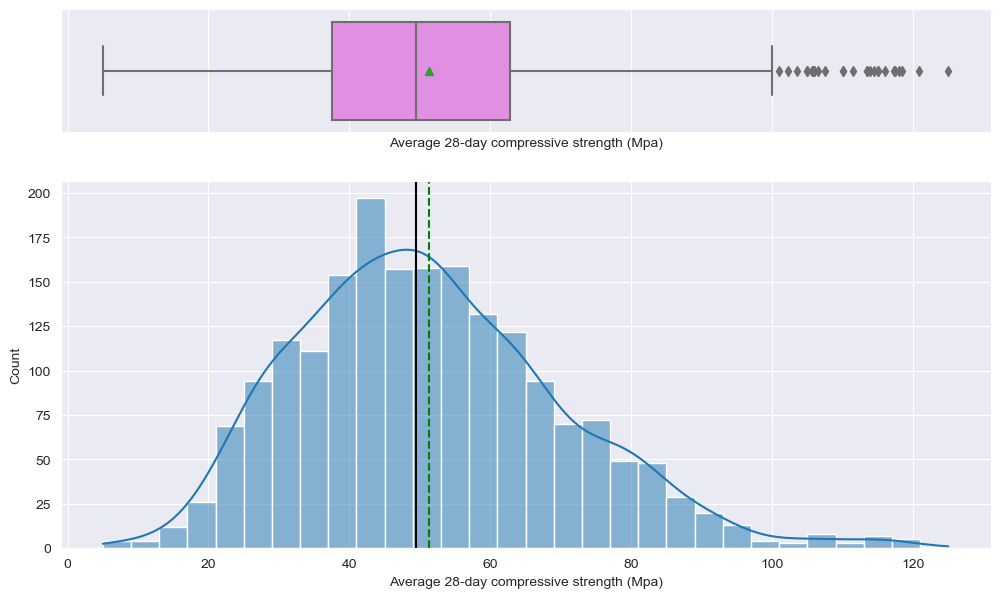

In [13]:
# Quick fix 

filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

## Curing method

In [14]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

In [15]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Data source':
1. Vu 2019            405
2. Yunusa 2014        144
J20. Atiş, 2005        96
J18. Cengiz 2006       90
20 Lollini 2021        72
                     ... 
11 Sundar 2017          4
22 Zhao 2021            4
J6. Li 1997             4
J30. Siddique 2004      4
J9. Li 2002             3
Name: Data source, Length: 71, dtype: int64

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


In [16]:
semi_df['Curing method'].isnull().sum()

8

In [17]:
missing = semi_df['Curing method'].isnull()
semi_df[missing]

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
1946,"J45. Kayali, 2012",0.0,450.0,0.0,0.0,0.0,0.0,0.0,171.0,5.130,...,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN
1947,"J45. Kayali, 2012",0.0,405.0,0.0,0.0,0.0,0.0,45.0,171.0,5.850,...,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN
1948,"J45. Kayali, 2012",0.0,337.5,0.0,0.0,0.0,112.5,0.0,171.0,5.850,...,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
1949,"J45. Kayali, 2012",0.0,292.5,0.0,0.0,0.0,112.5,45.0,171.0,5.895,...,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN
1950,"J45. Kayali, 2012",0.0,225.0,0.0,0.0,0.0,225.0,0.0,171.0,5.400,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
1951,"J45. Kayali, 2012",0.0,180.0,0.0,0.0,0.0,225.0,45.0,171.0,5.850,...,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN
1952,"J45. Kayali, 2012",0.0,135.0,0.0,0.0,0.0,315.0,0.0,171.0,4.230,...,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN
1953,"J45. Kayali, 2012",0.0,90.0,0.0,0.0,0.0,315.0,45.0,171.0,5.850,...,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN


In [18]:
semi_df = semi_df.dropna(subset = ['Curing method'])
semi_df['Curing method'].isnull().sum()

0

In [19]:
new_df = semi_df.copy()
new_df = pd.concat([semi_df, pd.get_dummies(semi_df['Curing method'])], axis=1)
new_df.head()

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Air,Moist,Sealed,Submerged
0,2. Yunusa 2014,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,...,30.0,75.93,NaN,NaN,3.139,NaN,0,0,0,1
1,2. Yunusa 2014,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,...,60.0,64.50,NaN,NaN,4.022,NaN,0,0,0,1
2,2. Yunusa 2014,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,...,100.0,49.23,NaN,NaN,6.670,NaN,0,0,0,1
3,2. Yunusa 2014,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,...,140.0,36.00,NaN,NaN,7.945,NaN,0,0,0,1
4,2. Yunusa 2014,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,...,40.0,62.80,NaN,NaN,6.052,NaN,0,0,0,1


## Data preparation

In [20]:
new_df = new_df.drop(['Curing humidity (%)', 'Curing day','Average carbonation coefficient (mm/year^0.5)', 'Slump (mm)', 'Average 28-day split strength (Mpa)', 'Average 28-day compressive strength (Mpa)', 'Curing method', 'Specimen size', 'Data source'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Slag content (kg/m^3)                                  1980 non-null   float64
 6   Silica fume content (kg/m^3)                           1980 non-null   float64
 7   Water content (kg/m^3)                                 1980 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [21]:
new_df = new_df.dropna()
new_df.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing temperature (Celsius degree)                      0
Chloride diffusion coefficient (10-12 m2/s)              0
Air                                                      0
Moist                                                    0
Sealed                                                  

# Train-test split

In [22]:
X = new_df.drop('Chloride diffusion coefficient (10-12 m2/s)', axis=1)
Y = new_df[['Chloride diffusion coefficient (10-12 m2/s)']]

# K- fold

* 10-fold

In [23]:
kfold =KFold(n_splits=10, random_state=42, shuffle=True)

# Min Max Scaler

In [24]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Model evaluation

* MAE, RMSE, R-square, and Adjusted R-square

In [25]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [26]:
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

# Model 1

In [27]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [28]:
# Initialize arrays to store the results
fold_results = []

# Iterate over the folds
for fold_no, (train, test) in enumerate(kfold.split(X_scaled, Y), 1):
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_shape=(17,)))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.001), metrics=['mae'])

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(X_scaled[train], Y.iloc[train], validation_data=(X_scaled[test], Y.iloc[test]),
                        batch_size=64,
                        epochs=100,
                        verbose=1)

    # Store the history for each fold
    fold_results.append(history)

    # Predict on the test set
    predictions = model.predict(X_scaled[test])

    # Evaluate model performance
    performance = model_performance_regression(X_scaled[test], Y.iloc[test], predictions)
    print(f'Performance for fold {fold_no}:')
    print(performance)

    # Increase fold number
    fold_no += 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
1/1 [==============================] - 1s 891ms/step - loss: 68.9901 - mae: 5.5015 - val_loss: 72.4693 - val_mae: 6.2845
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 63.6568 - mae: 4.9869 - val_loss: 67.9047 - val_mae: 5.8888
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 59.7361 - mae: 4.5879 - val_loss: 63.7502 - val_mae: 5.5227
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 56.3419 - mae: 4.2389 - val_loss: 59.8599 - val_mae: 5.3560
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 53.3769 - mae: 3.9517 - val_loss: 56.3586 - val_mae: 5.1943
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 50.8324 - mae: 3.7259 - val_loss: 53.3218 - val_mae: 5.0403
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 48.6328 - mae: 3.5374 - val_loss: 50.5

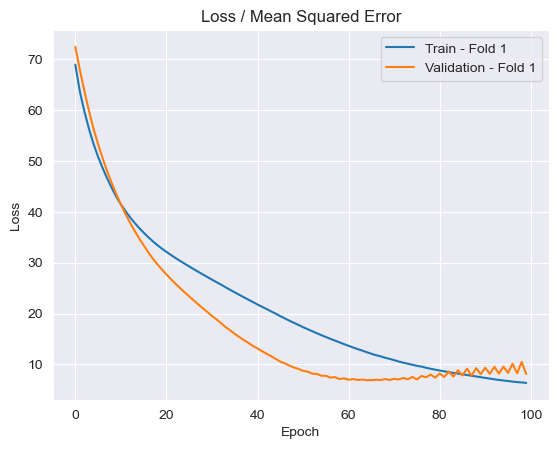

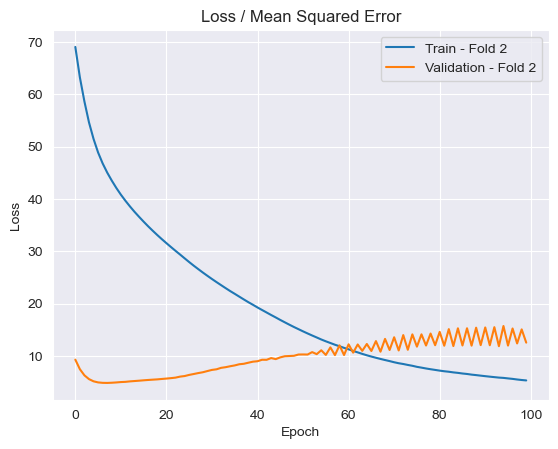

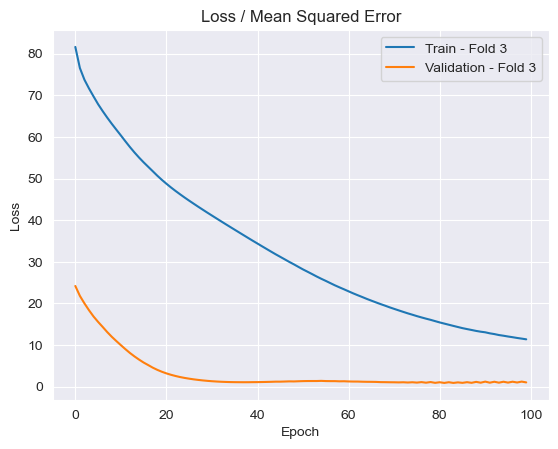

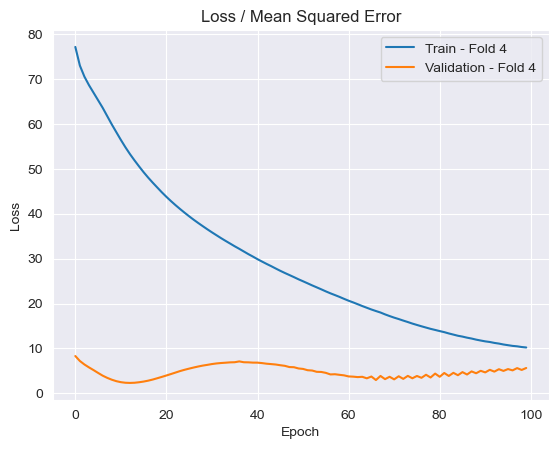

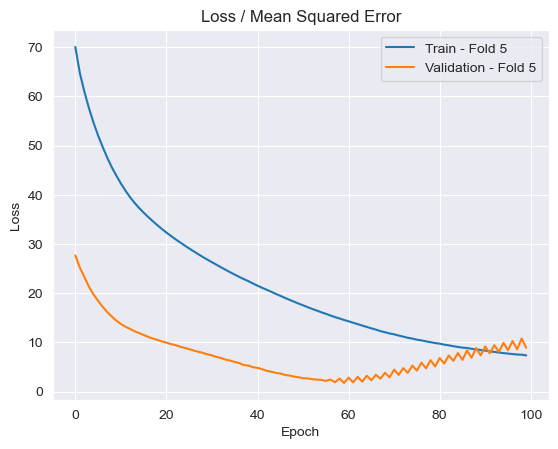

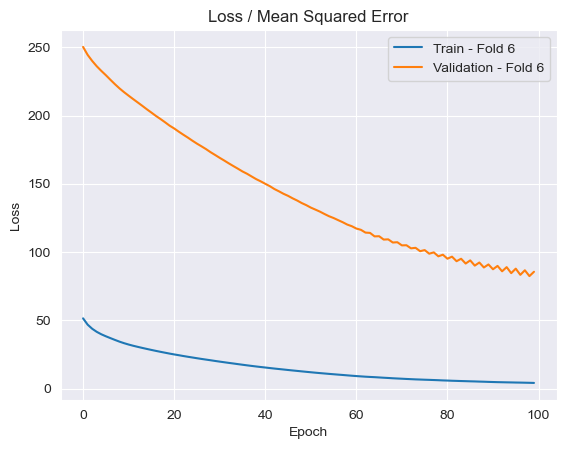

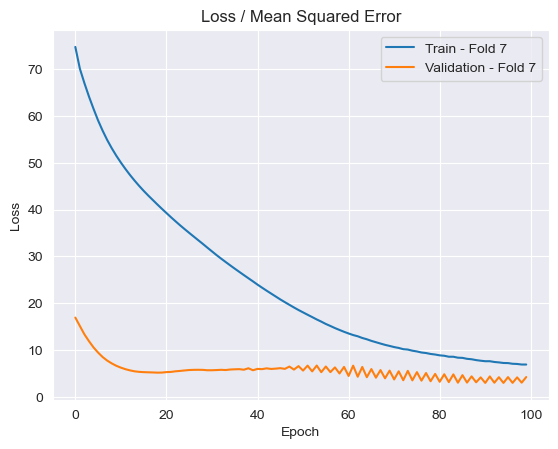

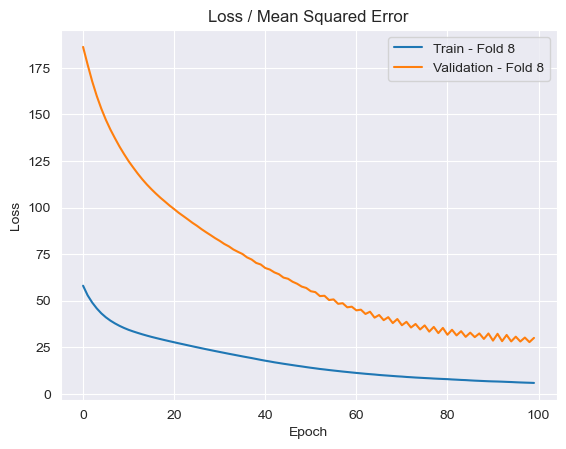

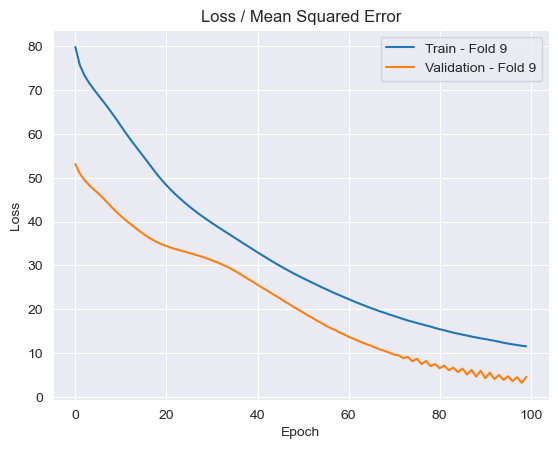

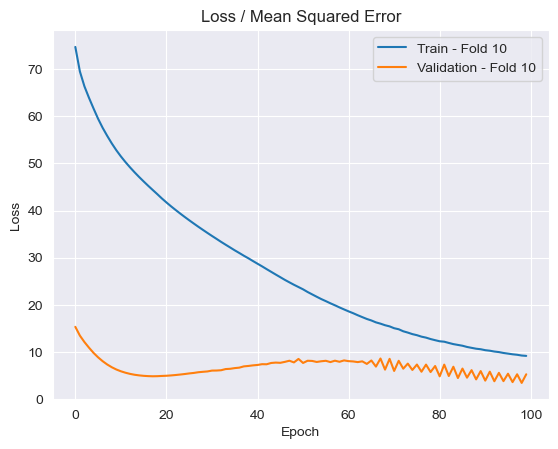

In [29]:
# Iterate over the folds
for fold, history in enumerate(fold_results, 1):
    # Plot training loss for the current fold
    plt.plot(history.history['loss'], label=f'Train - Fold {fold}')
    plt.plot(history.history['val_loss'], label = f'Validation - Fold {fold}')

    # Set plot title and labels
    plt.title('Loss / Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Display legend and show the plot
    plt.legend()
    plt.show()

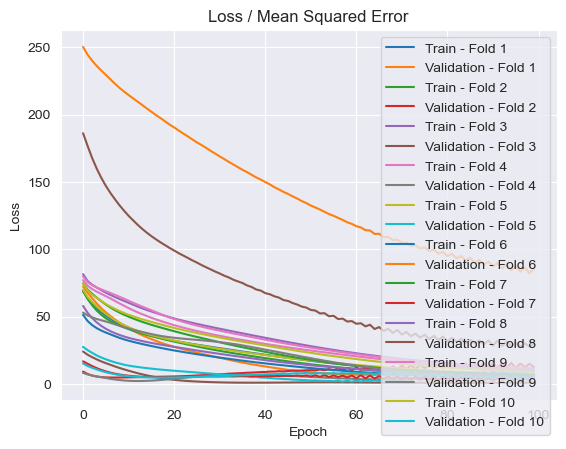

In [30]:
# Iterate over the folds
for fold, history in enumerate(fold_results, 1):
    # Plot training loss for the current fold
    plt.plot(history.history['loss'], label=f'Train - Fold {fold}')
    plt.plot(history.history['val_loss'], label = f'Validation - Fold {fold}')

# Set plot title and labels
plt.title('Loss / Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display legend and show the plot
plt.legend()
plt.show()

In [31]:
# Create an empty list to store the RMSE values for each fold
rmse_scores = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kfold.split(X_scaled), 1):
    # Split the data into training and test sets for the current fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the model on the training data for the current fold
    model.fit(X_train, y_train)

    # Predict on the test set for the current fold
    predictions = model.predict(X_test)

    # Calculate RMSE for the current fold
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append(rmse)

    # Print the RMSE for the current fold
    print(f'RMSE for fold {fold}: {rmse}')

# Calculate mean and standard deviation of RMSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Print mean and standard deviation of RMSE
print(f'Mean RMSE: {mean_rmse}')
print(f'Standard Deviation of RMSE: {std_rmse}')

1/1 [==============================] - 0s 21ms/step
RMSE for fold 1: 2.4370488345716885
1/1 [==============================] - 0s 16ms/step
RMSE for fold 2: 2.50369602791906
1/1 [==============================] - 0s 10ms/step
RMSE for fold 3: 1.3815061627021592
1/1 [==============================] - 0s 21ms/step
RMSE for fold 4: 1.4499632878897561
1/1 [==============================] - 0s 26ms/step
RMSE for fold 5: 2.4342512547911896
1/1 [==============================] - 0s 6ms/step
RMSE for fold 6: 6.711751137141055
1/1 [==============================] - 0s 10ms/step
RMSE for fold 7: 0.9884389116029513
1/1 [==============================] - 0s 5ms/step
RMSE for fold 8: 3.6622528601567854
1/1 [==============================] - 0s 22ms/step
RMSE for fold 9: 0.7250261758770054
1/1 [==============================] - 0s 16ms/step
RMSE for fold 10: 1.6349198207857791
Mean RMSE: 2.392885447343743
Standard Deviation of RMSE: 1.6589322398214918


In [32]:
pred = model.predict(X_scaled)
performance = model_performance_regression(X_scaled, Y, pred)
performance

2/2 [==============================] - 0s 0s/step


,RMSE,MAE,R-squared,Adj. R-squared
0,2.733483,1.632067,0.806268,0.729676


In [33]:
# Fixing the seed for random number generators so that we can ensure we receive the same output every time
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [35]:

# Initialize arrays to store the results
rmse_scores = []

# Iterate over the folds
for fold_no, (train_index, test_index) in enumerate(kfold.split(X_scaled), 1):
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_shape=(17,)))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.001), metrics=['mae'])

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Split the data into training and test sets for the current fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Fit data to model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        batch_size=64,
                        epochs=100,
                        verbose=1)

    # Store the history for each fold
    # (you can keep this if you want to analyze or plot the training history for each fold)
    rmse_scores.append(history.history['val_mae'])

    # Predict on the test set
    predictions = model.predict(X_test)

    # Evaluate model performance
    performance = model_performance_regression(X_test, y_test, predictions)
    print(f'Performance for fold {fold_no}:')
    print(performance)

# Calculate mean and standard deviation of RMSE
rmse_scores = np.sqrt(np.mean(rmse_scores, axis=0))
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Print mean and standard deviation of RMSE
print(f'Mean RMSE: {mean_rmse}')
print(f'Standard Deviation of RMSE: {std_rmse}')

# Predict on the full dataset
pred = model.predict(X_scaled)
performance = model_performance_regression(X_scaled, Y, pred)
performance


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
1/1 [==============================] - 1s 721ms/step - loss: 62.5267 - mae: 4.8766 - val_loss: 63.4592 - val_mae: 5.5521
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 57.1756 - mae: 4.3045 - val_loss: 58.1500 - val_mae: 5.1389
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 52.9631 - mae: 3.8943 - val_loss: 53.0282 - val_mae: 4.8871
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 49.4606 - mae: 3.6576 - val_loss: 49.0475 - val_mae: 4.7007
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 46.6787 - mae: 3.5216 - val_loss: 45.7503 - val_mae: 4.6148
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 44.3892 - mae: 3.4215 - val_loss: 43.0225 - val_mae: 4.5399
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 42.5474 - mae: 3.3484 - val_loss: 40.6

,RMSE,MAE,R-squared,Adj. R-squared
0,2.606569,1.557006,0.82384,0.754195


# Hyperparameter tuning

In [29]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [30]:
# Define the function to create the model
def create_model(activation, neurons, optimizer, learning_rate, dropout, batch_normalization):
    model = Sequential()
    model.add(Dense(neurons[0], activation=activation, kernel_initializer='he_uniform', input_shape=(17,)))

    if batch_normalization:
        model.add(BatchNormalization())

    if dropout > 0:
        model.add(Dropout(dropout))

    for i in range(1, len(neurons)):
        model.add(Dense(neurons[i], activation=activation, kernel_initializer='he_uniform'))

        if batch_normalization:
            model.add(BatchNormalization())

        if dropout > 0:
            model.add(Dropout(dropout))

    model.add(Dense(1, activation='linear'))

    if optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = RMSprop(learning_rate=learning_rate)

    model.compile(loss='mse', optimizer=opt, metrics=['mae'], batch_size=64)

    return model

In [31]:
# Define the parameter distribution for random search
param_dist = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'hidden_layer_sizes': [(128, 32, 32), (64, 32, 32, 16), (128, 32, 16, 8)],
    'solver': ['sgd', 'adam', 'rmsprop'],
    'learning_rate_init': uniform(0.001, 0.01),
    'alpha': uniform(0.0001, 0.001),
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200],
    'early_stopping': [True, False],
    
}

# Create the MLPRegressor estimator
model = MLPRegressor()

# Perform random search cross-validation
random = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=10, cv=10)
random_result = random.fit(X_scaled, Y)

# Get the best hyperparameters and the corresponding performance
best_params = random_result.best_params_
best_score = np.sqrt(-random_result.best_score_)
print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

Best Parameters: {'activation': 'tanh', 'alpha': 0.00010077876584101433, 'early_stopping': False, 'hidden_layer_sizes': (128, 32, 32), 'learning_rate': 'constant', 'learning_rate_init': 0.004042422429595377, 'max_iter': 200, 'solver': 'sgd'}
Best RMSE: 3.504395749110851


In [32]:
# Create MLPRegressor with best parameters
best_model = MLPRegressor(**best_params)

# Fit the best model to the data
best_model.fit(X_scaled, Y)

# Use the best model for predictions
predictions = best_model.predict(X_scaled)

Tuned_performance=model_performance_regression(X_scaled, Y, predictions)
Tuned_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,1.839358,1.203078,0.912279,0.877599


# Overall results

In [33]:
df_predictions = pd.DataFrame({'True Values': Y.values.flatten(), 'Predicted Values': predictions.flatten()})
df_predictions

,True Values,Predicted Values
0,9.270,6.718983
1,7.120,5.028630
2,3.550,3.496580
3,5.370,3.281763
4,2.300,2.438745
...,...,...
56,1.550,0.638341
57,3.375,2.299374
58,1.000,1.814573
59,0.500,1.615998


In [34]:
df_predictions['Difference'] = df_predictions['True Values'] - df_predictions['Predicted Values']
df_predictions

,True Values,Predicted Values,Difference
0,9.270,6.718983,2.551017
1,7.120,5.028630,2.091370
2,3.550,3.496580,0.053420
3,5.370,3.281763,2.088237
4,2.300,2.438745,-0.138745
...,...,...,...
56,1.550,0.638341,0.911659
57,3.375,2.299374,1.075626
58,1.000,1.814573,-0.814573
59,0.500,1.615998,-1.115998


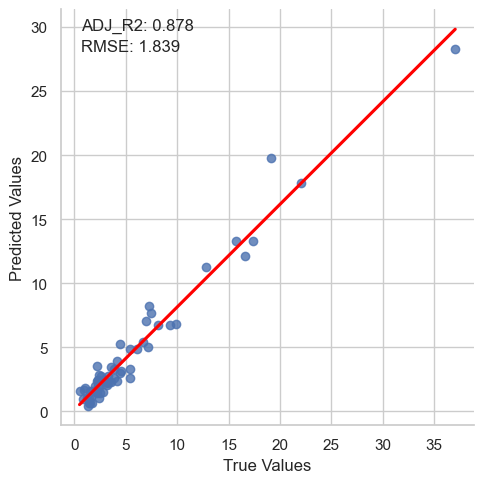

In [35]:
r2 = r2_score(df_predictions['True Values'], df_predictions['Predicted Values'])
adj_r2 = adj_r2_score(X_scaled, Y, predictions)
rmse = mean_squared_error(df_predictions['True Values'], df_predictions['Predicted Values'], squared=False)

# Create the lmplot
sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with R2 and RMSE
plt.text(0.05, 0.95, f'ADJ_R2: {adj_r2:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

# Shap

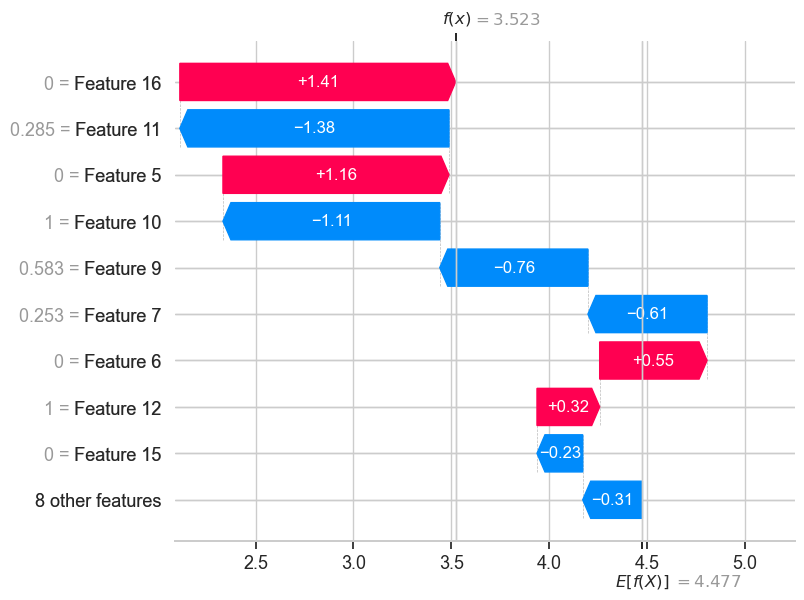

In [36]:
explainer = shap.Explainer(best_model.predict, X_scaled)
shap_values = explainer(X_scaled)
sample_ind = 42
shap.plots.waterfall(shap_values[sample_ind])

In [39]:
new_df.iloc[42]

ASTM type 1 ordinary Portland Cement content (kg/m^3)     350.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3)       0.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3)       0.000
Class C Fly ash content (kg/m^3)                            0.000
Class F Fly ash content (kg/m^3)                            0.000
Slag content (kg/m^3)                                       0.000
Silica fume content (kg/m^3)                                0.000
Water content (kg/m^3)                                    157.700
Superplasticizer content (kg/m^3)                           4.212
Maximum coarse aggregate size (mm)                         20.000
Coarse aggregate content (kg/m^3)                        1201.400
Fine aggregate content (kg/m^3)                           708.600
Curing temperature (Celsius degree)                        37.000
Chloride diffusion coefficient (10-12 m2/s)                 2.170
Air                                                         1.000
Moist     

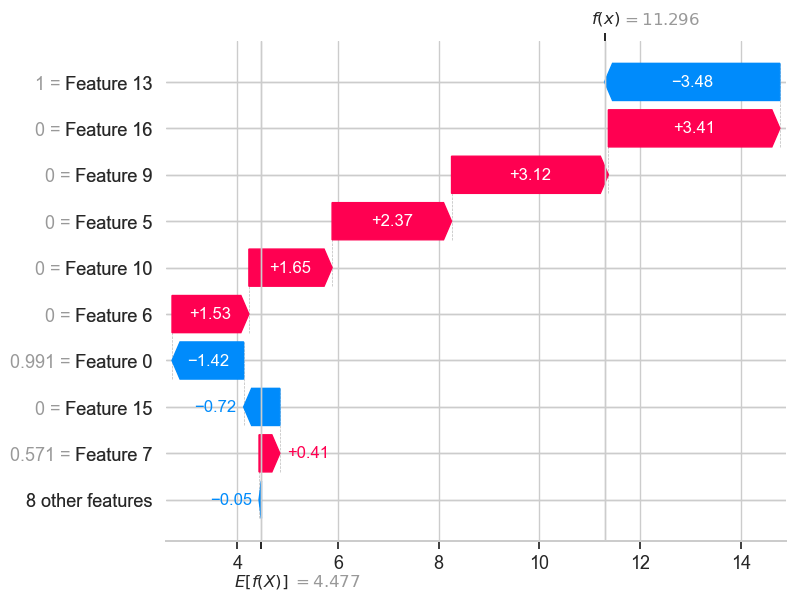

In [40]:
explainer = shap.Explainer(best_model.predict, X_scaled)
shap_values = explainer(X_scaled)
sample_ind = 30
shap.plots.waterfall(shap_values[sample_ind])

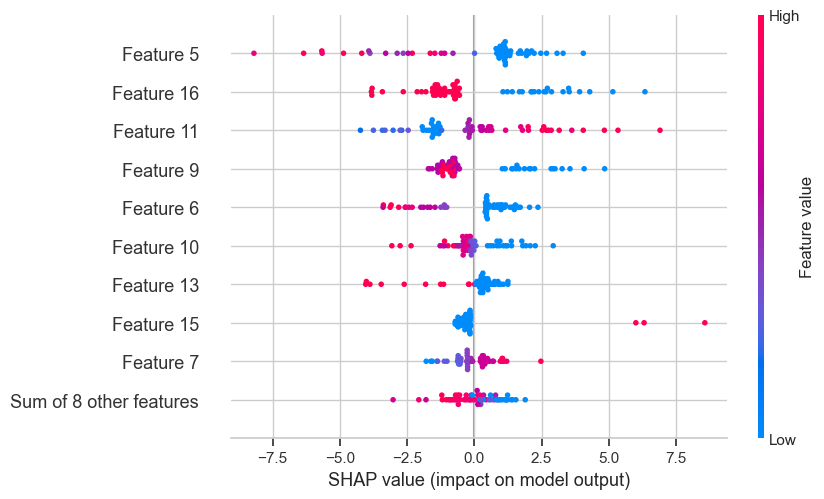

In [37]:
shap.plots.beeswarm(shap_values)